<b>3. Decision Tree</b>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

Step 1: Create data (2D data)

In [3]:
def generate_xor(n=400):
    np.random.seed(42)
    X = np.random.randn(n, 2)
    y = (X[:, 0] * X[:, 1] > 0).astype(int)
    return X, y

Step 2: Try logistic regression

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x1, w1, x2, w2, b):
    return sigmoid(w1 * x1 + w2 * x2 + b)

def bce_loss(y, y_pred):
    epsilon = 1e-9   # to avoid log(0)
    return -(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon)).mean()

def train(x1, x2, y, lr=0.1, epochs=2000):

    w1,w2,b = 0.0,0.0,0.0
    losses = []
    
    for i in range(epochs):

        y_pred = predict(x1,w1,x2,w2,b)

        loss = bce_loss(y,y_pred)
        losses.append(loss)

        dw1 = ((y_pred - y) * x1).mean()
        dw2 = ((y_pred - y) * x2).mean()
        db = ((y_pred - y)).mean()

        w1 -= lr * dw1
        w2 -= lr * dw2
        b -= lr * db

    return w1,w2,b,losses

def plot_loss(losses):
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Binary Cross Entropy")
    plt.title("Loss vs Epoch")
    plt.grid(True)
    plt.show()

Step 3: Test

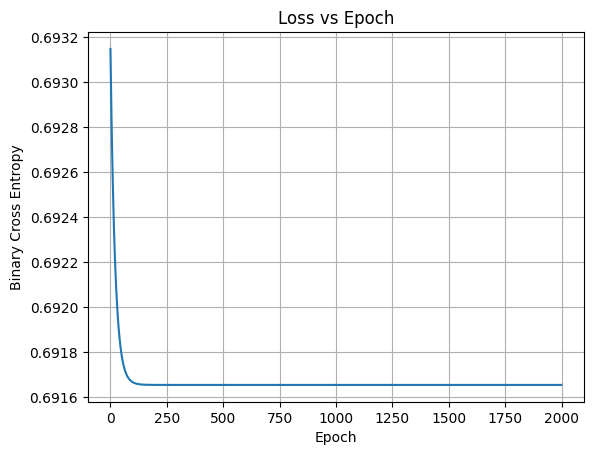

In [8]:
x,y = generate_xor(n=400)

x1 = x[:, 0]
x2 = x[:, 1]

w1,w2,b,losses = train(x1,x2,y,lr=0.1,epochs=2000)

plot_loss(losses)

![Loss vs Epoch for 1D data](Images/outputml1.png)


Step 4: using decision tree algorithm

In [30]:
def predict(x,y,m):

    model = DecisionTreeClassifier(max_depth=m)
    model.fit(x, y)

    return model

Step 5: plot 

In [43]:
#AI generated
def plot_decision_boundary(model, X, y, resolution=300):
 
    # 1. Define grid boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 2. Create mesh grid
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution)
    )

    # 3. Flatten grid for model input
    grid = np.c_[xx.ravel(), yy.ravel()]

    # 4. Predict classes for all grid points
    Z = model.predict(grid)

    # 5. Reshape predictions back to grid shape
    Z = Z.reshape(xx.shape)

    # 6. Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Decision Boundary")
    plt.show()


Step 6: Main code

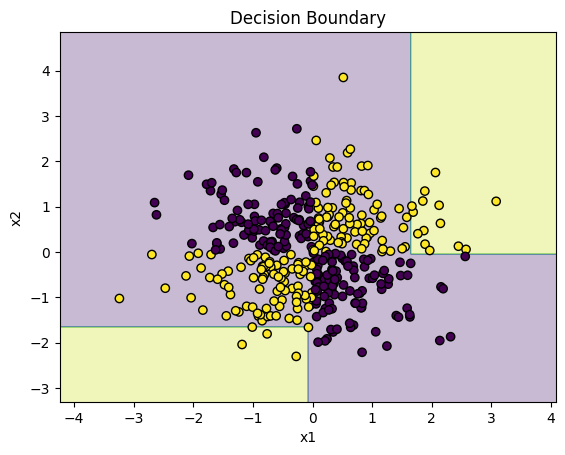

In [44]:
x,y = generate_xor(n=400)

model = predict(x,y,3)

plot_decision_boundary(model, x, y, resolution=300)

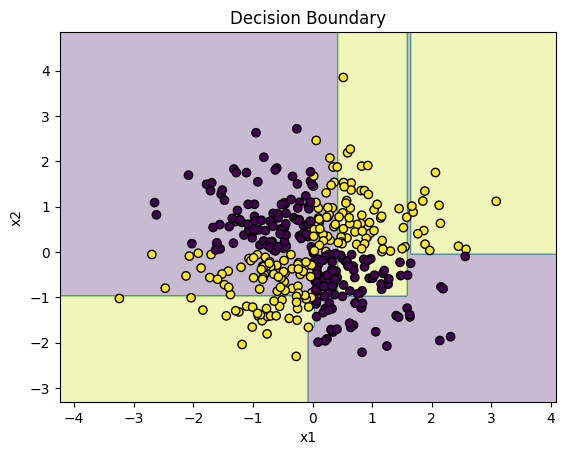

In [45]:
model = predict(x,y,5)

plot_decision_boundary(model, x, y, resolution=300)

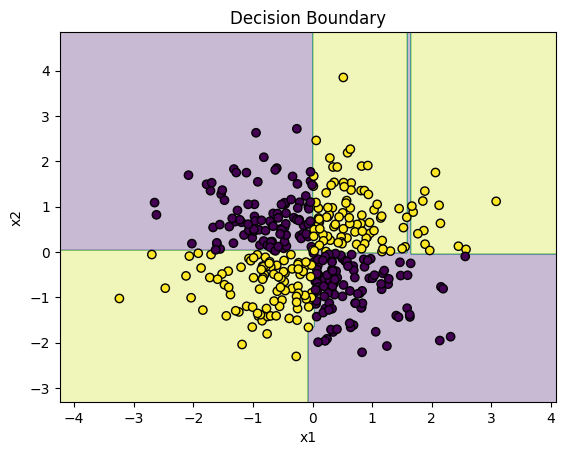

In [46]:
model = predict(x,y,7)

plot_decision_boundary(model, x, y, resolution=300)

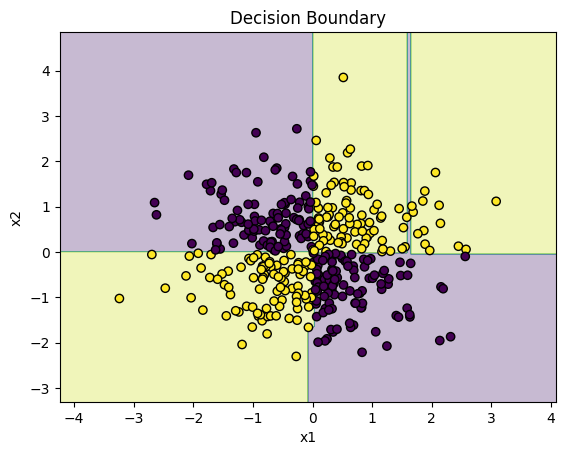

In [47]:
model = predict(x,y,20)

plot_decision_boundary(model, x, y, resolution=300)